# Titanic Dataset

Titanic Competition is ususally the first competition an aspiring data scientist compete in. The dataset contains details for all the passengers who boarded Titanic on its maiden voyage in 1912.with label whether they survived or not. 

The data 
Since, this is my first notebook being published. Any constructive critism is welcomed.

In [1]:
#Importing relevant libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting
import seaborn as sns #prettier Plotting
import plotly.express as px # Do explore it!
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Loading Data

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv', index_col = 'PassengerId')
test = pd.read_csv('/kaggle/input/titanic/test.csv', index_col = 'PassengerId')

print('Train dataset has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('Test dataset has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

Train dataset has 891 rows and 11 columns
Test dataset has 418 rows and 10 columns


In [3]:
print('Training Data:')
display(train.head(8).T)
print('*'*200)
print('Testing Data:')
display(test.head(8).T)

Training Data:


PassengerId,1,2,3,4,5,6,7,8
Survived,0,1,1,1,0,0,0,0
Pclass,3,1,3,1,3,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard"
Sex,male,female,female,female,male,male,male,male
Age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0
SibSp,1,1,0,1,0,0,0,3
Parch,0,0,0,0,0,0,0,1
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075
Cabin,NaN,C85,NaN,C123,NaN,NaN,E46,NaN


********************************************************************************************************************************************************************************************************
Testing Data:


PassengerId,892,893,894,895,896,897,898,899
Pclass,3,3,2,3,3,3,3,2
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)","Svensson, Mr. Johan Cervin","Connolly, Miss. Kate","Caldwell, Mr. Albert Francis"
Sex,male,female,male,male,female,male,female,male
Age,34.5,47.0,62.0,27.0,22.0,14.0,30.0,26.0
SibSp,0,1,0,0,1,0,0,1
Parch,0,0,0,0,1,0,0,1
Ticket,330911,363272,240276,315154,3101298,7538,330972,248738
Fare,7.8292,7.0,9.6875,8.6625,12.2875,9.225,7.6292,29.0
Cabin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,Q,S,Q,S,S,S,Q,S


In [4]:
train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
Cabin,204,147,B96 B98,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check for any missing values
print('Missing values in training data :', train.isnull().sum() )
print('*'*50)
print('Missing values in training data :', test.isnull().sum() )

Missing values in training data : Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
**************************************************
Missing values in training data : Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


## Dealing with Missing Values

In [6]:
print('Percentage of Mising values in Cabin:', train['Cabin'].isnull().sum()/len(train) )
print('*'*50)
print('Percentage of Mising values in Age:', train['Age'].isnull().sum()/len(train) )
print('*'*50)
print('Percentage of Mising values in Embark:', train['Embarked'].isnull().sum()/len(train) )

Percentage of Mising values in Cabin: 0.7710437710437711
**************************************************
Percentage of Mising values in Age: 0.19865319865319866
**************************************************
Percentage of Mising values in Embark: 0.002244668911335578


As we saw above that 'Cabin' has 77% data points missing. Hence, I will drop it since imputing it might introduce bias in the data.


As for missing data in Age we can impute it in two ways:
- **Mean/median of whole data** : We can impute the missing values by taking average of all the passengers. 

- **Mean/median based on Pclass** : Imputing the values based on class a passenger travelling. This might be better when imputing because first class might have older population, than third class which also contained crew members since they are younger . 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

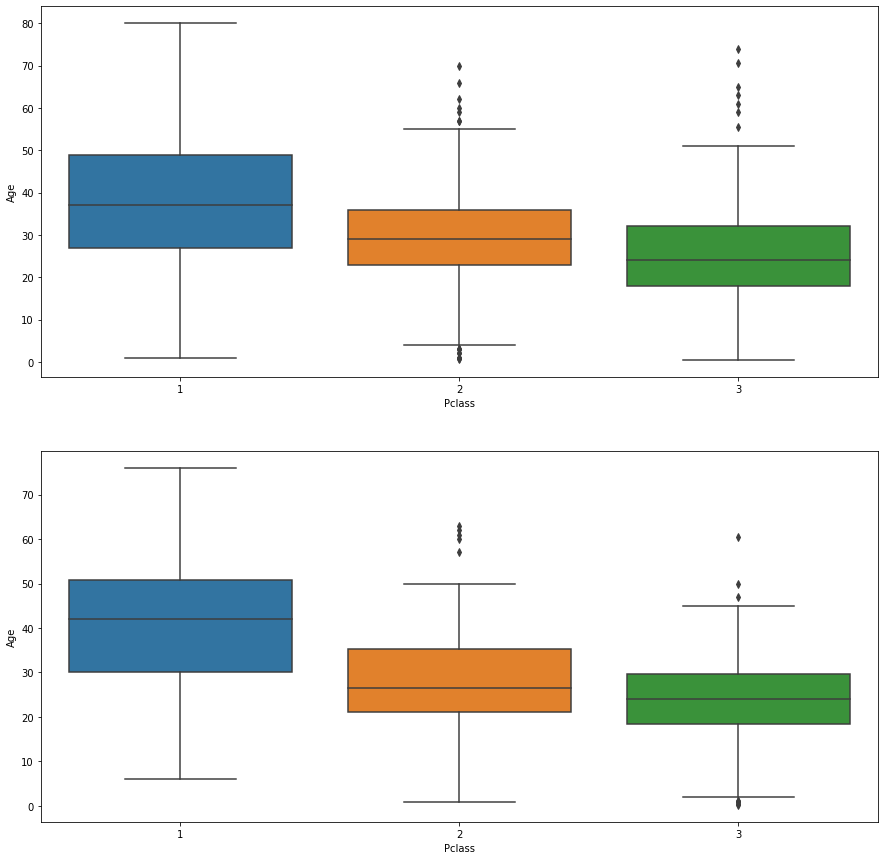

In [7]:
fig , ax = plt.subplots(2,1,figsize = (15,15))

sns.boxplot(x = 'Pclass', y = 'Age',data = train, ax = ax[0])
sns.boxplot(x = 'Pclass', y = 'Age',data = test, ax= ax[1])

In [8]:
def impute_age(df, strategy = 'mean', stratified = True):
    '''
    df = Pandas Dataset
    strategy = 'mean', 'median'
    stratified  = Boolean (based on Pclass)
    '''
    if stratified == False:
        
        if strategy == 'mean':
            print('Mean age :', df['Age'].mean())
            df['Age'] = df['Age'].fillna(df['Age'].mean())
            
            return df
            
        elif strategy == 'median':
            print('Mean age :', df['Age'].median())
            df['Age'] = df['Age'].fillna(df['Age'].median())
            
            return df
            
        else:
            raise Exception("Invalid Type of strategy. Select either 'mean' or 'median'")
            
    if stratified == True:
        
        if strategy == 'mean':
            print('Mean age for first class :', df[df['Pclass'] == 1]['Age'].mean())
            print('Mean age for second class :', df[df['Pclass'] == 2]['Age'].mean())
            print('Mean age for third class :', df[df['Pclass'] == 3]['Age'].mean())
            
            df.loc[df['Pclass'] == 1,'Age'] = df.loc[df['Pclass'] == 1,'Age'].fillna(df[df['Pclass'] == 1]['Age'].mean())
            df.loc[df['Pclass'] == 2,'Age'] = df.loc[df['Pclass'] == 2,'Age'].fillna(df[df['Pclass'] == 2]['Age'].mean())
            df.loc[df['Pclass'] == 3,'Age'] = df.loc[df['Pclass'] == 3,'Age'].fillna(df[df['Pclass'] == 3]['Age'].mean())
            
            return df
            
            
        elif strategy == 'median':
            print('Median age for first class :', df[df['Pclass'] == 1]['Age'].median())
            print('Median age for second class :', df[df['Pclass'] == 2]['Age'].median())
            print('Median age for third class :', df[df['Pclass'] == 3]['Age'].median())
            
            df.loc[df['Pclass'] == 1,'Age'] = df.loc[df['Pclass'] == 1,'Age'].fillna(df[df['Pclass'] == 1]['Age'].median())
            df.loc[df['Pclass'] == 2,'Age'] = df.loc[df['Pclass'] == 2,'Age'].fillna(df[df['Pclass'] == 2]['Age'].median())
            df.loc[df['Pclass'] == 3,'Age'] = df.loc[df['Pclass'] == 3,'Age'].fillna(df[df['Pclass'] == 3]['Age'].median())
            
            return df
            
        else:
            raise Exception("Invalid Type of strategy. Select either 'mean' or 'median'")            


In [9]:
train= impute_age(train, strategy = 'median')
test= impute_age(test, strategy = 'median')

Median age for first class : 37.0
Median age for second class : 29.0
Median age for third class : 24.0
Median age for first class : 42.0
Median age for second class : 26.5
Median age for third class : 24.0


In [10]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
# Imputed the missing value with most frequent 
train['Embarked'] = train['Embarked'].fillna('S')

train = train.drop('Cabin', axis = 1)
test = test.drop('Cabin', axis = 1)

## Exploratory Data Analysis

<AxesSubplot:>

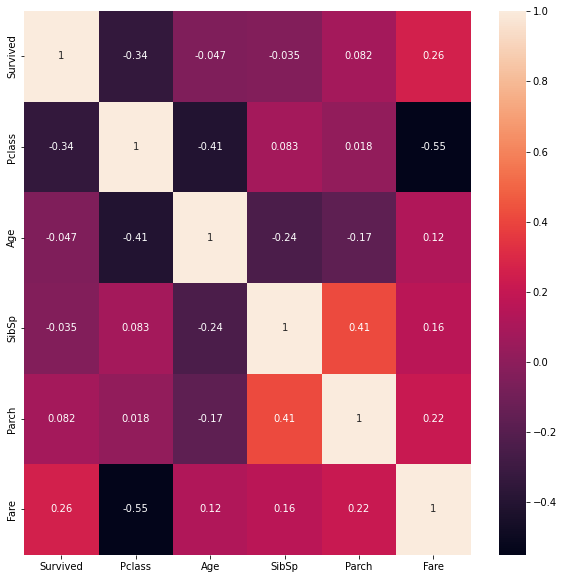

In [12]:
# Lets begin with correlation of different features
feature_corr = train.corr()
feature_corr

fig , ax = plt.subplots(figsize = (10,10))
sns.heatmap(feature_corr, annot = True)

In [13]:
s = train.groupby('Survived').size().reset_index()
s.columns = ['Survived', 'Count']

fig = px.pie(s, values='Count', names='Survived', title='Distribution of people survived')
fig.show()

We further explore how do different factors affect your changes of survival.

spliting the passenger into different age groups. 

In [14]:
def age_grouping(df):
    df['ageGroup'] = np.nan
    df.loc[df['Age'] <= 12, 'ageGroup'] = 'child'
    df.loc[(df['Age'] > 12) & (df['Age'] <= 19), 'ageGroup'] = 'teen'
    df.loc[(df['Age'] > 19) & (df['Age'] <= 45), 'ageGroup'] = 'adults'
    df.loc[(df['Age'] > 45) & (df['Age'] <= 60), 'ageGroup'] = 'midAgedAdults'
    df.loc[df['Age'] > 60, 'ageGroup'] = 'old'
    
    return df

In [15]:
train = age_grouping(train)
test = age_grouping(test)

a = train.groupby('ageGroup').size().reset_index()
a.columns = ['Group', 'Count']

sa = train.loc[train['Survived'] == 1].groupby('ageGroup').size().reset_index()
sa.columns = ['Group', 'Count']

In [16]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=a.Group.values, values=a.Count.values, name="Age Group"),
              1, 1)
fig.add_trace(go.Pie(labels=sa.Group.values, values=sa.Count.values, name="Survivor Age Group"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole = 0.4, textinfo="label+percent")

fig.update_layout(
    title_text="Passenger Age Group Titanic",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Passengers', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Survivors', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

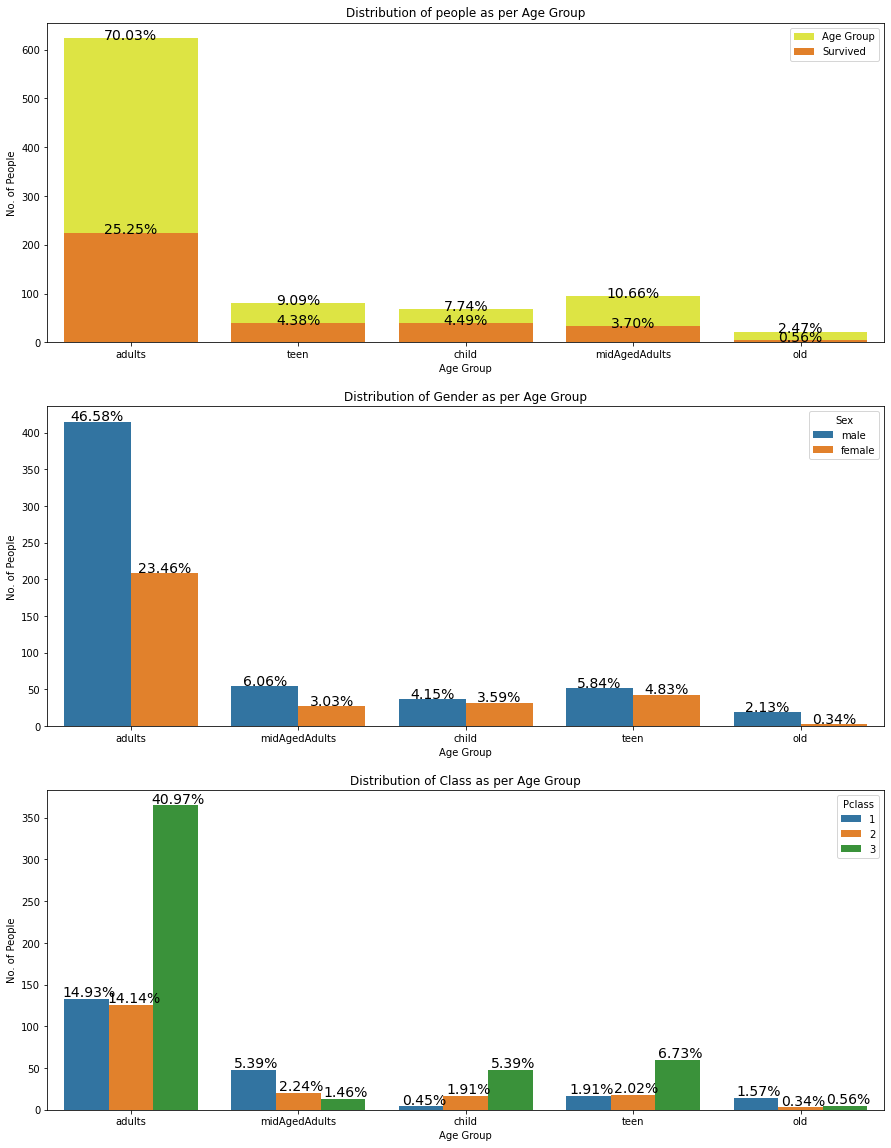

In [17]:
fig , ax = plt.subplots(3,1,figsize = (15,20))


sns.countplot(x ='ageGroup', data = train, color = '#F5FF29', ax = ax[0] , label = 'Age Group')
sns.countplot(x ='ageGroup', data = train.loc[train['Survived'] == 1], color = '#FF7E0C', ax = ax[0], label = 'Survived' )
ax[0].set_title('Distribution of people as per Age Group')
ax[0].set_xlabel('Age Group')
ax[0].set_ylabel('No. of People')
ax[0].legend()

for p in ax[0].patches:
        ax[0].annotate('{:.2f}%'.format(p.get_height()/len(train)*100), (p.get_x()+0.4, p.get_height()+20),ha='center', va='top', color='black', size=14)
        

sns.countplot(x = 'ageGroup', data = train, hue = 'Sex', ax = ax[1])
ax[1].set_title('Distribution of Gender as per Age Group')
ax[1].set_xlabel('Age Group')
ax[1].set_ylabel('No. of People')       
        
for p in ax[1].patches:
        ax[1].annotate('{:.2f}%'.format(p.get_height()/len(train)*100), (p.get_x()+0.2, p.get_height()+16),ha='center', va='top', color='black', size=14)
        

sns.countplot(x = 'ageGroup', data = train, hue = 'Pclass', ax = ax[2])
ax[2].set_title('Distribution of Class as per Age Group')
ax[2].set_xlabel('Age Group')
ax[2].set_ylabel('No. of People')       
        
for p in ax[2].patches:
        ax[2].annotate('{:.2f}%'.format(p.get_height()/len(train)*100), (p.get_x()+0.15, p.get_height()+16),ha='center', va='top', color='black', size=14)

Its interesting to see that 41% of passengers are adults belonging to third class. Proving our hypothesis proposed in imputation as True.

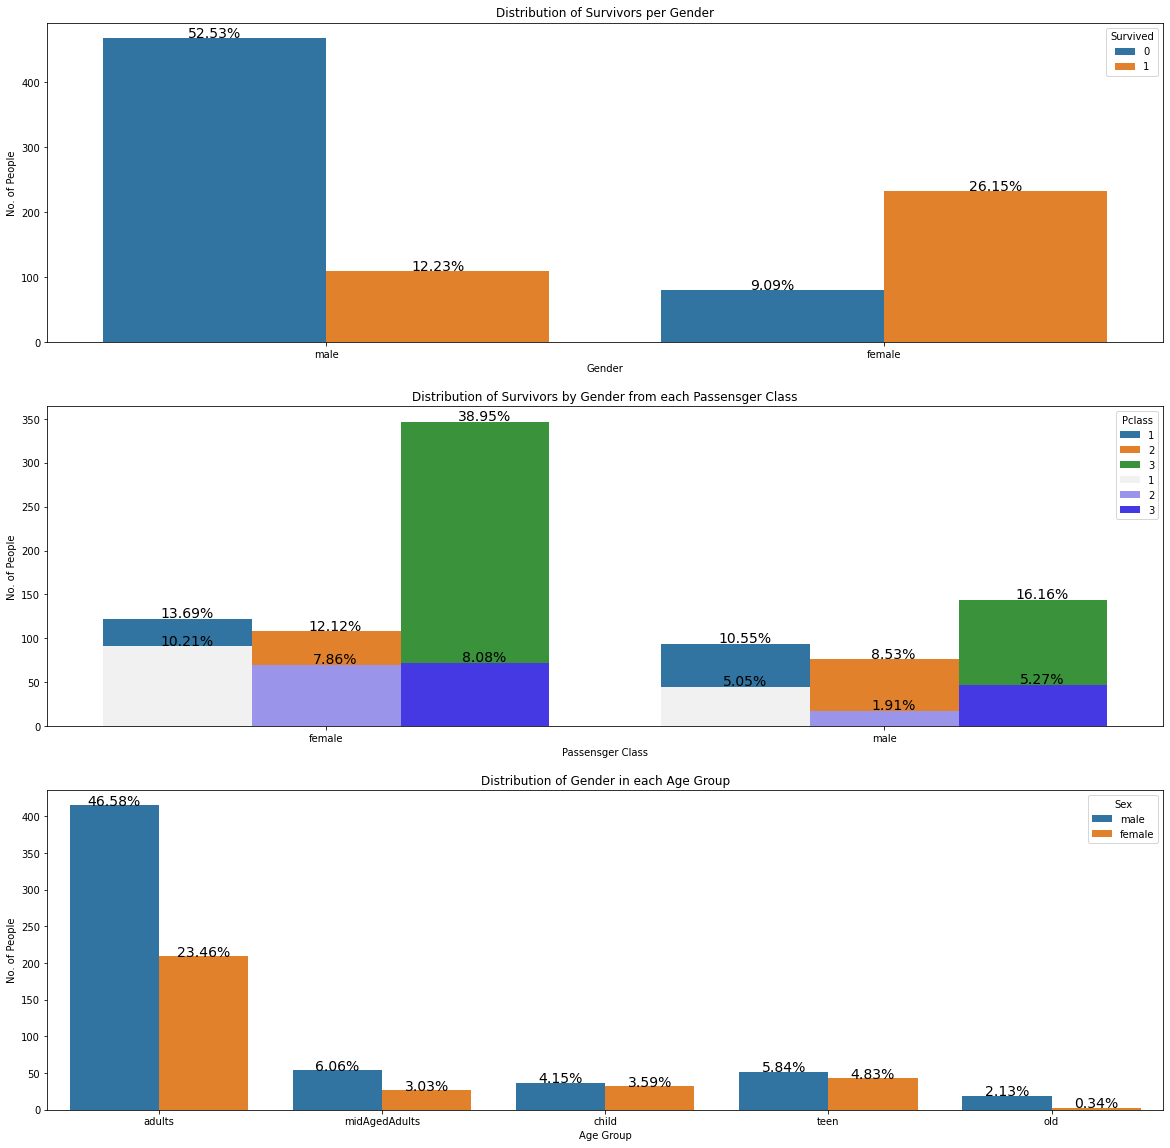

In [18]:
f, ax = plt.subplots(3,1,figsize = (20,20))

sns.countplot(x = 'Sex', data = train, hue = 'Survived', ax = ax[0])
ax[0].set_title('Distribution of Survivors per Gender')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('No. of People')
for p in ax[0].patches:
        ax[0].annotate('{:.2f}%'.format(p.get_height()/len(train)*100), (p.get_x()+0.2, p.get_height()+18),ha='center', va='top', color='black', size=14)
        

sns.countplot(x = 'Sex', data = train, hue = 'Pclass', ax = ax[1])
sns.countplot(x = 'Sex', data = train.loc[train['Survived'] == 1], color = '#2C1DFF', hue = 'Pclass', ax = ax[1])
ax[1].set_title('Distribution of Survivors by Gender from each Passensger Class')
ax[1].set_xlabel('Passensger Class')
ax[1].set_ylabel('No. of People')
for p in ax[1].patches:
        ax[1].annotate('{:.2f}%'.format(p.get_height()/len(train)*100), (p.get_x()+0.15, p.get_height()+14),ha='center', va='top', color='black', size=14)

        
sns.countplot(x = 'ageGroup', data = train, hue = 'Sex', ax = ax[2])
ax[2].set_title('Distribution of Gender in each Age Group')
ax[2].set_xlabel('Age Group')
ax[2].set_ylabel('No. of People')
for p in ax[2].patches:
        ax[2].annotate('{:.2f}%'.format(p.get_height()/len(train)*100), (p.get_x()+0.2, p.get_height()+15),ha='center', va='top', color='black', size=14) 

Lets check out some stats from port of embarkment

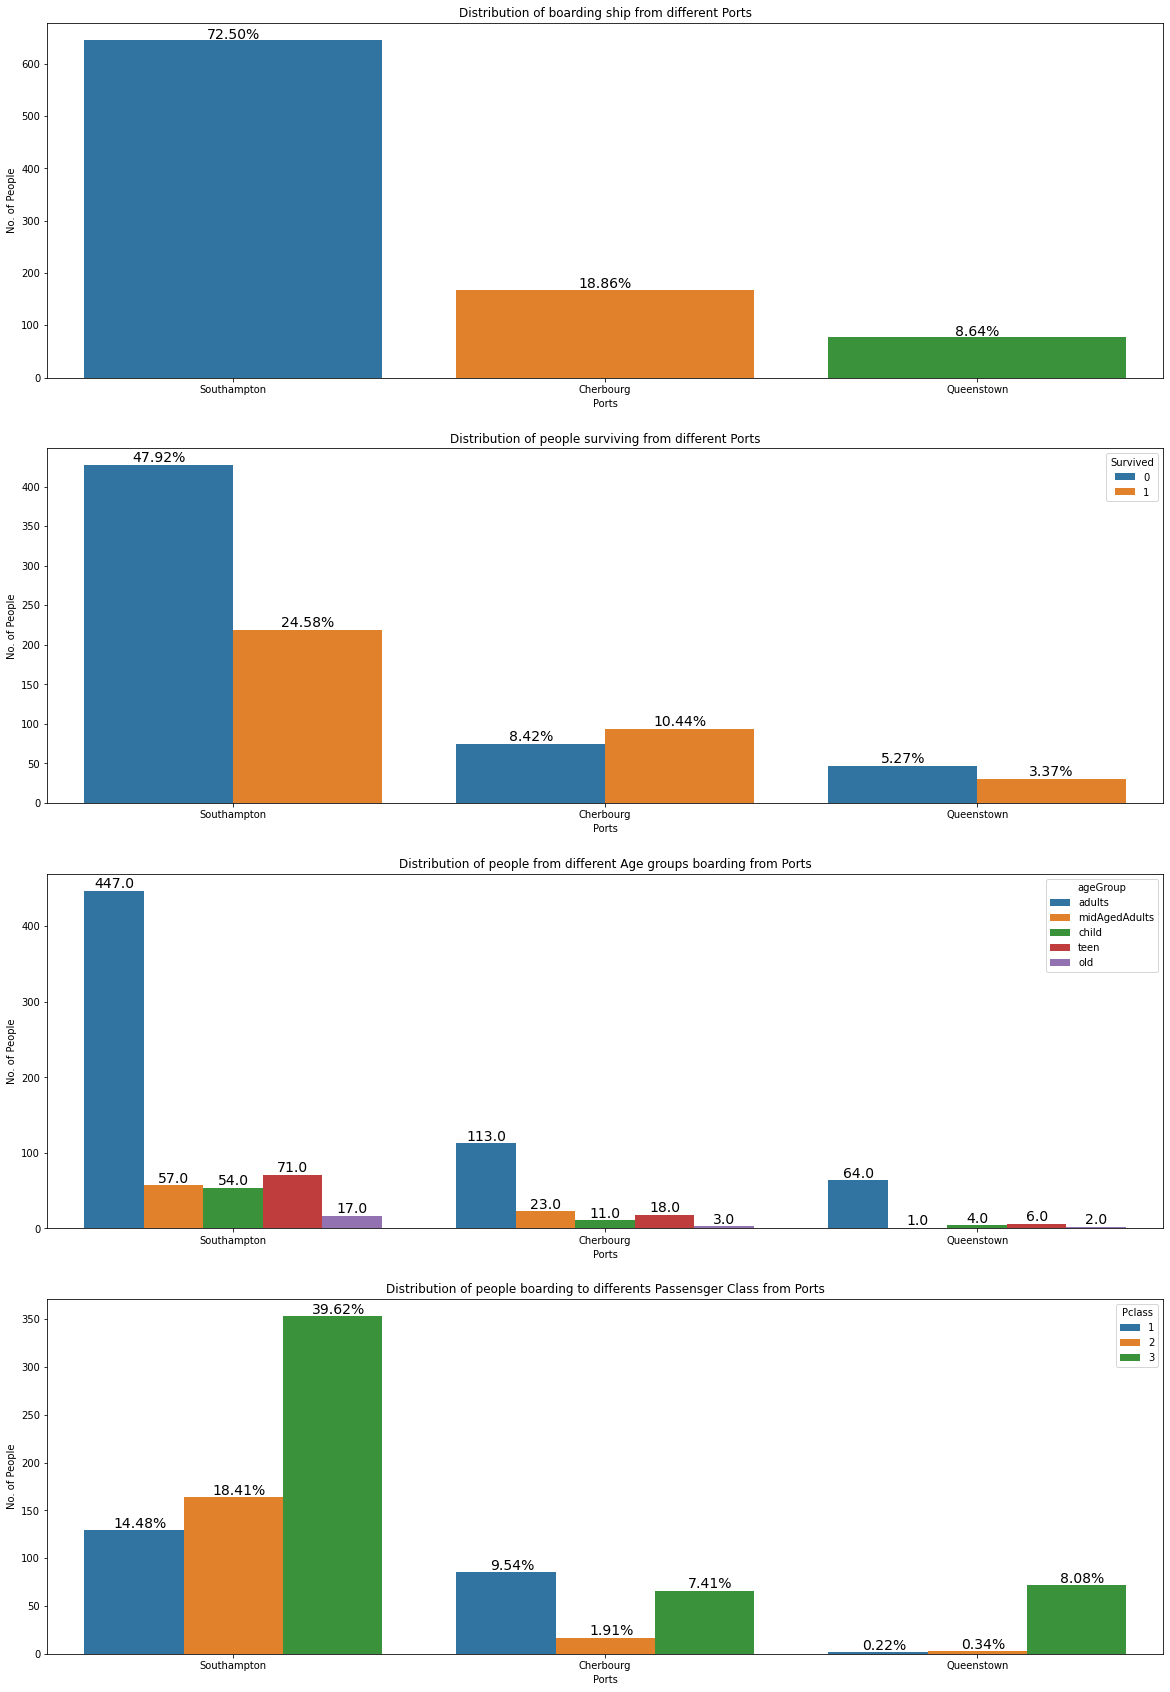

In [19]:
f, ax = plt.subplots(4,1,figsize = (20,30))

# FF7E0C(Orange), F5FF29(yellow)
sns.countplot(x = 'Embarked', data = train, ax = ax[0])
ax[0].set_title('Distribution of boarding ship from different Ports')
ax[0].set_xlabel('Ports')
ax[0].set_ylabel('No. of People')
ax[0].set_xticklabels(( 'Southampton','Cherbourg', 'Queenstown'))
for p in ax[0].patches:
        ax[0].annotate('{:.2f}%'.format(p.get_height()/len(train)*100), (p.get_x()+0.4, p.get_height()+24),ha='center', va='top', color='black', size=14)
        
        
sns.countplot(x = 'Embarked', data = train, hue = 'Survived', ax = ax[1])
ax[1].set_title('Distribution of people surviving from different Ports')
ax[1].set_xlabel('Ports')
ax[1].set_ylabel('No. of People')
ax[1].set_xticklabels(( 'Southampton','Cherbourg', 'Queenstown'))
for p in ax[1].patches:
        ax[1].annotate('{:.2f}%'.format(p.get_height()/len(train)*100), (p.get_x()+0.2, p.get_height()+18),ha='center', va='top', color='black', size=14)
        

sns.countplot(x = 'Embarked', data = train, hue = 'ageGroup', ax = ax[2])
ax[2].set_title('Distribution of people from different Age groups boarding from Ports')
ax[2].set_xlabel('Ports')
ax[2].set_ylabel('No. of People')
ax[2].set_xticklabels(( 'Southampton','Cherbourg', 'Queenstown'))
for p in ax[2].patches:
        ax[2].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.08, p.get_height()+18),ha='center', va='top', color='black', size=14)
        
sns.countplot(x = 'Embarked', data = train, hue = 'Pclass', ax = ax[3])
ax[3].set_title('Distribution of people boarding to differents Passensger Class from Ports')
ax[3].set_xlabel('Ports')
ax[3].set_ylabel('No. of People')
ax[3].set_xticklabels(( 'Southampton','Cherbourg', 'Queenstown'))
for p in ax[3].patches:
        ax[3].annotate('{:.2f}%'.format(p.get_height()/len(train)*100), (p.get_x()+0.15, p.get_height()+14),ha='center', va='top', color='black', size=14)

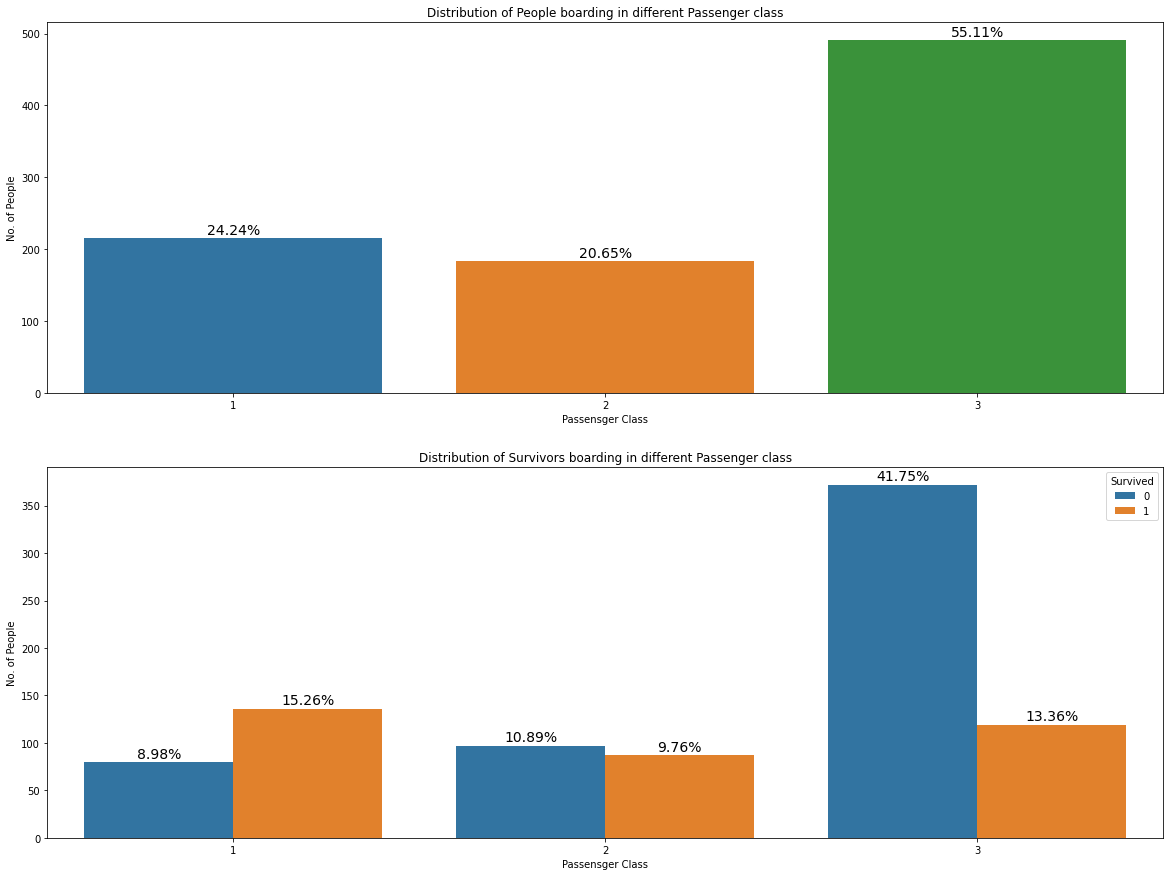

In [20]:
f, ax = plt.subplots(2,1,figsize = (20,15))

# FF7E0C(Orange), F5FF29(yellow)
sns.countplot(x = 'Pclass', data = train, ax = ax[0])
ax[0].set_title('Distribution of People boarding in different Passenger class')
ax[0].set_xlabel('Passensger Class')
ax[0].set_ylabel('No. of People')
for p in ax[0].patches:
        ax[0].annotate('{:.2f}%'.format(p.get_height()/len(train)*100), (p.get_x()+0.4, p.get_height()+20),ha='center', va='top', color='black', size=14)
        
        
sns.countplot(x = 'Pclass', data = train, hue = 'Survived', ax = ax[1])
ax[1].set_title('Distribution of Survivors boarding in different Passenger class')
ax[1].set_xlabel('Passensger Class')
ax[1].set_ylabel('No. of People')
for p in ax[1].patches:
        ax[1].annotate('{:.2f}%'.format(p.get_height()/len(train)*100), (p.get_x()+0.2, p.get_height()+16),ha='center', va='top', color='black', size=14)
        

Now, we Deduce if the person is travelling alone or with family

In [21]:
# Deducing if the passenger is t

train['familySize'] = train['SibSp'] + train['Parch'] + 1 #1 is person himself/herself
test['familySize'] = test['SibSp'] + test['Parch'] + 1

In [22]:
train.loc[train['familySize'] == 1, 'is_alone'] = 1
train.loc[train['familySize'] > 1, 'is_alone'] = 0

test.loc[test['familySize'] == 1, 'is_alone'] = 1
test.loc[test['familySize'] > 1, 'is_alone'] = 0

In [23]:
a = train.groupby(['is_alone', 'Sex']).size().reset_index()
a.columns = ['Alone', 'Sex','Count']
a.loc[a['Alone'] == 1, 'Alone'] = 'Yes'
a.loc[a['Alone'] == 0, 'Alone'] = 'No'
a


,Alone,Sex,Count
0,No,female,188
1,No,male,166
2,Yes,female,126
3,Yes,male,411


In [24]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=a.Alone.values, values=a.Count.values, name="Alone?"),
              1, 1)

a.loc[a['Alone']==1]
fig.add_trace(go.Pie(labels=a.Sex.values, values=a.Count.values, name="Solo Traveller"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole = 0.4, textinfo="label+percent")

fig.update_layout(
    title_text="People travelling with Companions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Is Alone?', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Lone Gender?', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [25]:
a = train.groupby('familySize').size().reset_index()
a.columns = ['familySize', 'Count']

fig = px.pie(a, values='Count', names='familySize', title = 'Family size of Passensgers')

fig.show()


In [26]:
def title_extract(data):
    
    # Extracting titles from Names
    data['title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    data['title'] = data['title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    data['title'] = data['title'].replace('Mlle', 'Miss')
    data['title'] = data['title'].replace('Ms', 'Miss')
    data['title'] = data['title'].replace('Mme', 'Mrs')   
        
    return data

def encode_cols(data):
    #     Encoding the data
    data['Sex'] = data['Sex'].map({'female' : 1, 'male':2})
    data['Embarked'] = data['Embarked'].map({'C': 1, 'Q':2 , 'S':3})
    data['title'] = data['title'].map({'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Rare':5})
    data['ageGroup'] = data['ageGroup'].map({'child':1, 'teen':2, 'adults':3, 'midAgedAdults':4, 'old':5})
    
    return data

In [27]:
train = title_extract(train)
test = title_extract(test)

In [28]:
a = train.groupby(['title', 'Survived']).size().reset_index()
a.columns = ['title', 'Survived', 'Count']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=a.title.values, values=a.Count.values, name="Title"),
              1, 1)

a.loc[a['Survived']==1]
fig.add_trace(go.Pie(labels=a.title.values, values=a.Count.values, name="Survivor Title"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole = 0.4, textinfo="label+percent")

fig.update_layout(
    title_text="Title of the Passensgers",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Title', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Survivor', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [29]:
train = encode_cols(train)
test = encode_cols(test)

In [30]:
train = train.drop(['Name', 'Ticket', 'Fare'], axis = 1)
test = test.drop(['Name', 'Ticket', 'Fare'], axis = 1)

In [31]:
label = train.pop('Survived')

Previously we have achieved:
LR = 77
RF = 72
SVM = 67

Now we will use Grid Search CV for training the model

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
#initially for Logistic Regression, random Forest  and SVM
def gridsearch(data, label, clf, param_grid, scoring = 'f1'):
    
    grid = GridSearchCV(clf, param_grid, n_jobs = -1, cv = 10, verbose = 2).fit(data, label)
    
    print('The best estimator :', grid.best_estimator_)
    print('Best Training Score ({}):'.format(scoring),grid.best_score_)
    
    return grid.best_estimator_

In [34]:
paraLR = {'penalty':['l1', 'l2'], 'intercept_scaling':[1,3,5,7,9], 'max_iter':[100,250,500,750,1000]}

LR = gridsearch(train, label, LogisticRegression(solver='liblinear'), paraLR)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.5s


[CV] intercept_scaling=1, max_iter=100, penalty=l1 ...................
[CV] .... intercept_scaling=1, max_iter=100, penalty=l1, total=   0.0s
[CV] intercept_scaling=1, max_iter=100, penalty=l1 ...................
[CV] .... intercept_scaling=1, max_iter=100, penalty=l1, total=   0.0s
[CV] intercept_scaling=1, max_iter=100, penalty=l1 ...................
[CV] .... intercept_scaling=1, max_iter=100, penalty=l1, total=   0.0s
[CV] intercept_scaling=1, max_iter=100, penalty=l2 ...................
[CV] .... intercept_scaling=1, max_iter=100, penalty=l2, total=   0.0s
[CV] intercept_scaling=1, max_iter=100, penalty=l2 ...................
[CV] .... intercept_scaling=1, max_iter=100, penalty=l2, total=   0.0s
[CV] intercept_scaling=1, max_iter=100, penalty=l2 ...................
[CV] .... intercept_scaling=1, max_iter=100, penalty=l2, total=   0.0s
[CV] intercept_scaling=1, max_iter=250, penalty=l1 ...................
[CV] .... intercept_scaling=1, max_iter=250, penalty=l1, total=   0.0s
[CV] i

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    5.3s finished


In [35]:
pred = pd.DataFrame(LR.predict(test))
pred.index = test.index
pred.columns = ['Survived']
pred.to_csv('lr.csv')

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size = 0.2, stratify = label)

In [37]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train) 
valid = lr.predict(X_test)

In [38]:
f1_score(y_test, valid)

0.7737226277372262

In [39]:
pred = pd.DataFrame(lr.predict(test))
pred.index = test.index
pred.columns = ['Survived']
pred.to_csv('lr.csv')

In [40]:
rf = RandomForestClassifier().fit(X_train, y_train)
valid = rf.predict(X_test)

f1_score(y_test, valid)

0.7761194029850746

In [41]:
pred = pd.DataFrame(rf.predict(test))
pred.index = test.index
pred.columns = ['Survived']
pred.to_csv('rf.csv')

In [42]:
svc = SVC().fit(X_train, y_train)
valid = svc.predict(X_test)

f1_score(y_test, valid)

0.391304347826087

In [43]:
pred = pd.DataFrame(svc.predict(test))
pred.index = test.index
pred.columns = ['Survived']
pred.to_csv('svc.csv')